# Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Exploratory Data Analysis

In [2]:
# Load and Inspect Data
data = pd.read_csv("2017_2020_bmi.csv")
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values and outliers
print(data.isnull().sum())

  yr  height  weight    bmi  gender
0  0   69.96   10.29  21.02       1
1  0   71.69   10.89  21.19       1
2  0   68.54   10.93  23.27       1
3  0   69.69    9.38  19.31       1
4  0   71.30    7.93  15.59       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      7770 non-null   object 
 1   height  7770 non-null   float64
 2   weight  7770 non-null   float64
 3   bmi     7770 non-null   float64
 4   gender  7770 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 303.6+ KB
None
            height       weight          bmi       gender
count  7770.000000  7770.000000  7770.000000  7770.000000
mean    150.460698    52.817423    22.074587     0.499228
std      22.463589    18.356921     3.515722     0.500032
min      65.120000     7.080000    14.340000     0.000000
25%     149.960000    42.700000    19.200000     0.000000
50

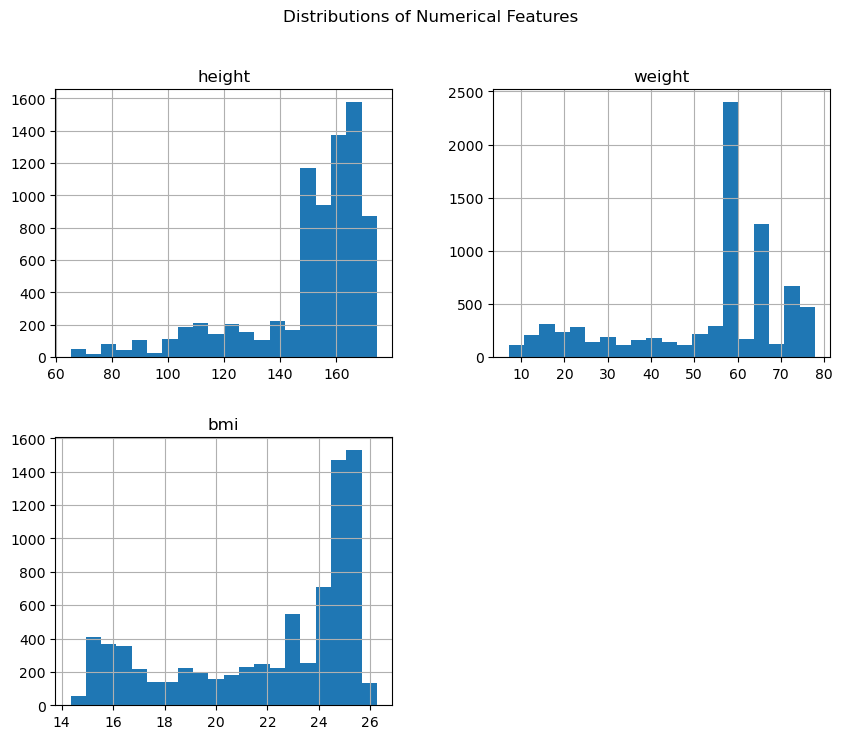

In [3]:
# Visualize the distribution of numerical columns with histograms
numeric_cols = ['yr', 'height', 'weight', 'bmi']
data[numeric_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("Distributions of Numerical Features")
plt.show()

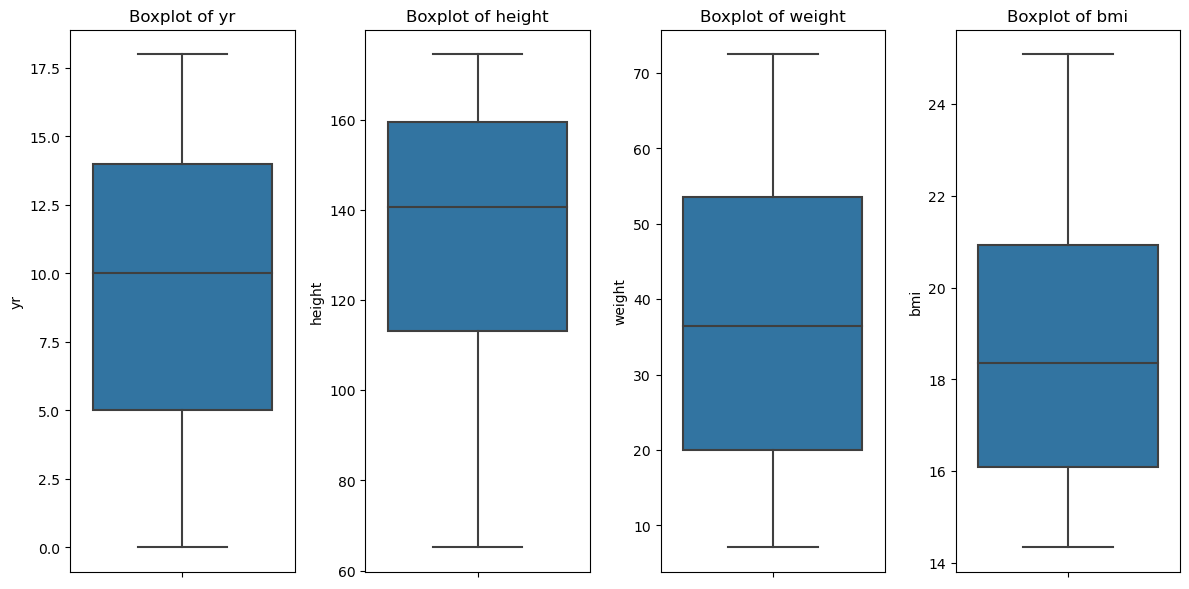

In [4]:
# Convert columns to numericy
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to NaN if conversion fails

# Drop rows with NaN values in the numeric columns
data = data.dropna(subset=numeric_cols)

# Box plots to check for outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    if pd.api.types.is_numeric_dtype(data[col]):
        sns.boxplot(y=data[col])
        plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

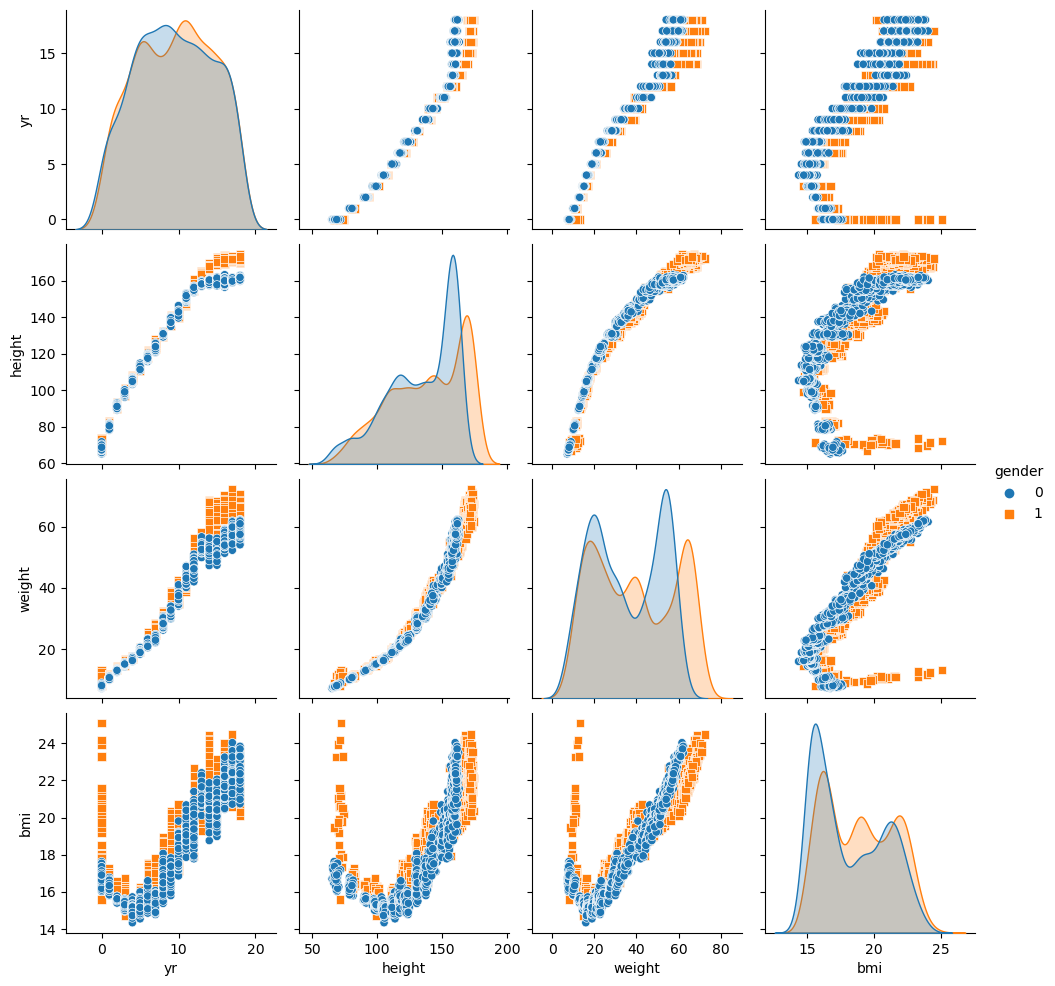

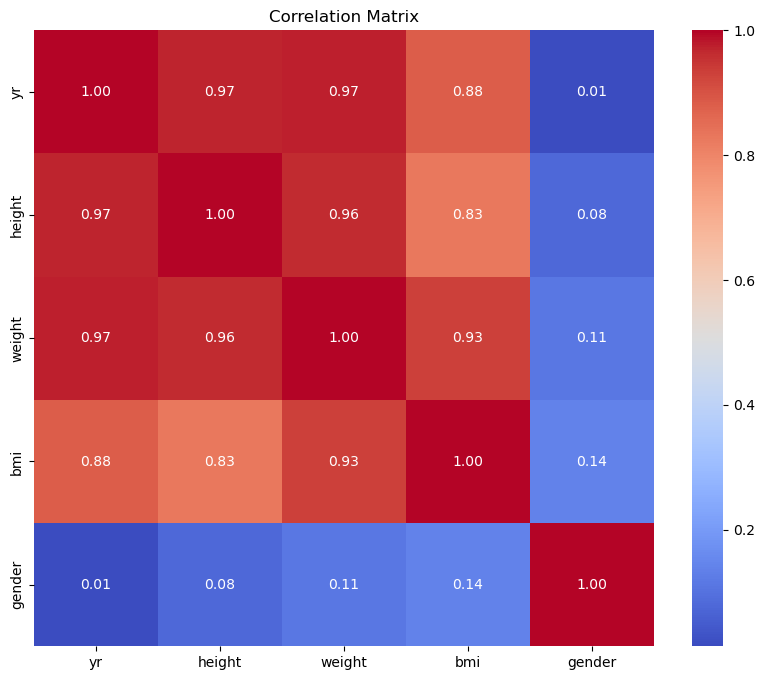

Skewness in BMI: 0.26172295670675927
Skewness in Weight: 0.12045606903762596


In [5]:
# Scatter plot and Correlation Matrix
sns.pairplot(data, hue="gender", diag_kind="kde", markers=["o", "s"])
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Checking skewness to see if transformations are needed
print("Skewness in BMI:", skew(data['bmi']))
print("Skewness in Weight:", skew(data['weight']))

# Pre Processing

In [8]:
# Separate features and target
X = data[['height', 'bmi']]
y = data['weight']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Show the shape of transformed features
print("Shape of X_train with polynomial features:", X_train_scaled.shape)


Shape of X_train with polynomial features: (2607, 5)


# Model Building - Linear Regression with Regularization

In [10]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Cross-validation for Ridge
ridge_cv_score = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
print("Ridge CV MSE:", -ridge_cv_score.mean())

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Cross-validation for Lasso
lasso_cv_score = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
print("Lasso CV MSE:", -lasso_cv_score.mean())


Ridge CV MSE: 0.055547101215613105
Lasso CV MSE: 0.9755523728551543


# Hyperparameter Tuning

In [12]:
# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearch for Ridge
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train_scaled, y_train)
print("Best alpha for Ridge:", ridge_grid.best_params_)
print("Best CV MSE for Ridge:", -ridge_grid.best_score_)

# GridSearch for Lasso
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring="neg_mean_squared_error")
lasso_grid.fit(X_train_scaled, y_train)
print("Best alpha for Lasso:", lasso_grid.best_params_)
print("Best CV MSE for Lasso:", -lasso_grid.best_score_)


Best alpha for Ridge: {'alpha': 0.01}
Best CV MSE for Ridge: 0.009109611790804297
Best alpha for Lasso: {'alpha': 0.01}
Best CV MSE for Lasso: 0.12544831953525062


C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+02, tolerance: 6.688e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.485e+02, tolerance: 6.595e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

# Model Evaluation

Ridge Test MSE: 0.008581902740717509
Ridge Test R^2: 0.9999734678520197
Lasso Test MSE: 0.11521019543436391
Lasso Test R^2: 0.9996438116293717


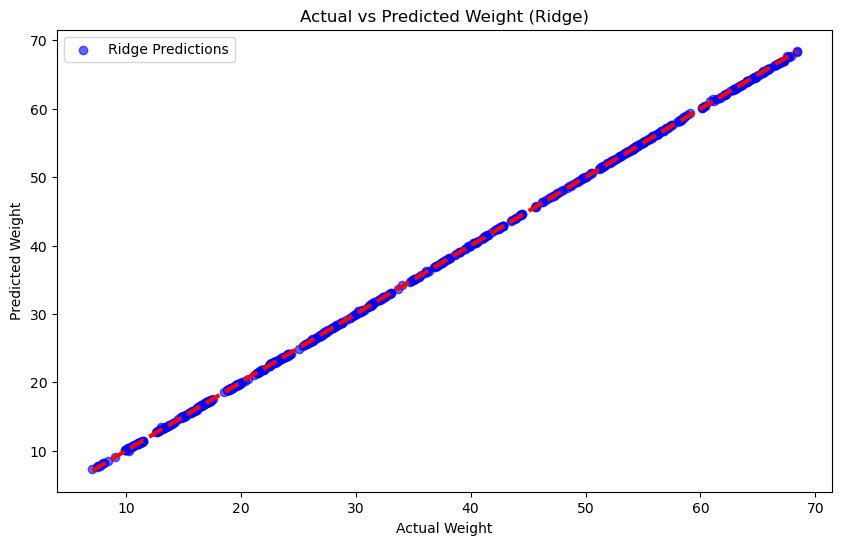

In [16]:
# Evaluate Ridge on test set
ridge_best = ridge_grid.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_scaled)
print("Ridge Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Test R^2:", r2_score(y_test, y_pred_ridge))

# Evaluate Lasso on test set
lasso_best = lasso_grid.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_scaled)
print("Lasso Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Test R^2:", r2_score(y_test, y_pred_lasso))

# Plot Actual vs Predicted for Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='b', label="Ridge Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=3)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight (Ridge)")
plt.legend()
plt.show()


# Make Predictions with the Best Model

In [17]:
# New data example for prediction
new_data = np.array([[170, 22]])  # height=170 cm, bmi=22
new_data_poly = poly.transform(new_data)
new_data_scaled = scaler.transform(new_data_poly)

# Predict using the best model (e.g., Ridge in this case)
predicted_weight = ridge_best.predict(new_data_scaled)
print("Predicted Weight:", predicted_weight[0])


Predicted Weight: 63.465288052625226


C:\Users\srinivasareddyb\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


# Residual Analysis

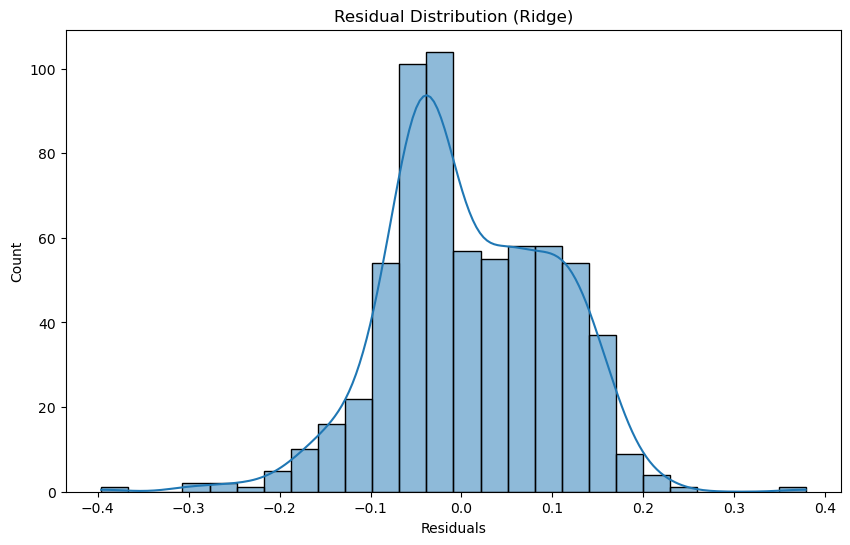

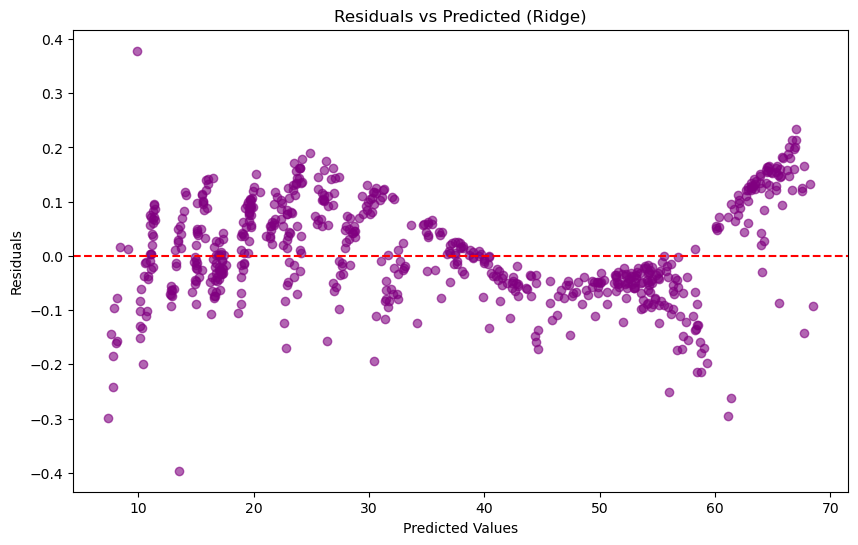

In [18]:
# Residuals for Ridge
residuals = y_test - y_pred_ridge

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution (Ridge)")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Ridge)")
plt.show()